<div Análise exploratória de microdados do ENEM >


<H1 style="color:RED">ANÁLISE DE MICRODADOS ENEM</H1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
microdadosEnem = pd.read_csv("microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv", sep=";", encoding='ISO_8859_1')

In [4]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [5]:
#Utilizar apenas as 100 primeiras linhas do dataset
df_selecionados_100=microdadosEnem[0:100]

In [6]:
print(microdadosEnem.isna().sum()) #VER VALORES NAM

NU_INSCRICAO       0
NU_ANO             0
TP_FAIXA_ETARIA    0
TP_SEXO            0
TP_ESTADO_CIVIL    0
                  ..
Q021               2
Q022               2
Q023               2
Q024               2
Q025               2
Length: 76, dtype: int64


In [7]:
#COLUNAS SELECIONADAS
selecionadas= ['NU_INSCRICAO','TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA','IN_TREINEIRO','NO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA','TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [8]:
df= microdadosEnem.filter(items=selecionadas)

In [9]:
df.rename(columns={'Q001': 'EDUC_PAI', 'Q002': 'EDUC_AME', 'Q003':'OCUP_PAI', 'Q004':'OCUP_MAE',
                   'Q005':'N_PESSOAS_CASA', 'Q006':'RENDA_FAM', 'Q007':'DOMESTICA', 'Q008':'BANHEIRO',
                  'Q009': 'N_QUARTOS', 'Q010': 'CARRO', 'Q011': 'MOTO', 'Q012':'GELADEIRA', 'Q013':'FREEZER',
                  'Q014':'MAQUINA_LAVAR', 'Q015':'MAQUINA_SECAR', 'Q016': 'MICROONDAS', 'Q017': 'MAQUINA_LOUCA',
                  'Q018':'ASPIRADOR', 'Q019': 'TELEVISAO', 'Q020':'DVD', 'Q021':'TV_ASSINATURA',
                  'Q022':'CELULAR', 'Q023': 'TELEFONE_FIXO', 'Q024':'COMPUTADOR', 'Q025': 'INTERNET'}, inplace=True)

In [10]:
df.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,MICROONDAS,MAQUINA_LOUCA,ASPIRADOR,TELEVISAO,DVD,TV_ASSINATURA,CELULAR,TELEFONE_FIXO,COMPUTADOR,INTERNET
0,210053865474,5,F,1,1,1,1,3,1,0,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,12,M,1,1,1,1,11,1,0,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,13,F,3,1,1,1,15,1,0,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,3,M,1,3,1,2,0,2,0,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2,F,1,3,1,2,0,2,0,...,B,A,A,B,A,B,E,A,B,B


### MUNÍCIPIOS E ESTADOS DAS PROVAS

In [12]:
municipio_provas=df['NO_MUNICIPIO_PROVA']
municipio_provas

0                      Nova Lima
1                         Maceió
2          Ferraz de Vasconcelos
3                          Crato
4                        Acarape
                   ...          
3389827                  Goiânia
3389828                 Londrina
3389829           Rio de Janeiro
3389830             Pouso Alegre
3389831                  Baraúna
Name: NO_MUNICIPIO_PROVA, Length: 3389832, dtype: object

In [13]:
municipio_provas.value_counts() #PARA CONTAR OS VALORES DE CADA MUNICÍPIO
                                #PARA MOSTRAR EM ORDEM ALFABÉTICA DE MUNICÍPIOS, ADICIONAR .sort_index ()
    # O VALUE_COUNTS() JÁ RETORNA POR ORDEM DESCRESCENTE

São Paulo              141840
Rio de Janeiro         102152
Fortaleza               72457
Brasília                67501
Salvador                58502
                        ...  
Barra do Turvo             53
Fernando de Noronha        47
Jordão                     44
Bonfim                     43
Santa Rosa do Purus        21
Name: NO_MUNICIPIO_PROVA, Length: 1712, dtype: int64

In [14]:
uf_provas=df['SG_UF_PROVA']
uf_provas.value_counts()

SP    509954
MG    327829
BA    266194
RJ    238347
CE    220517
PE    193616
PA    185978
RS    150484
PR    144282
GO    136915
MA    127905
PB    102002
AM     89778
RN     80820
SC     80765
PI     79969
DF     67501
ES     64181
AL     56584
MT     56085
SE     53796
MS     42490
RO     32801
TO     30873
AP     21774
AC     20336
RR      8056
Name: SG_UF_PROVA, dtype: int64

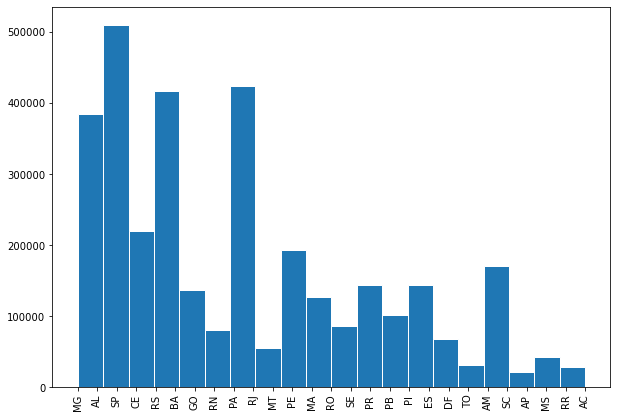

In [15]:
plt.figure(figsize=(10, 7)) 
plt.hist(uf_provas,bins=20,edgecolor='white')
plt.xticks(rotation=90) 
plt.show() 

### DADOS CANDIDATOS

In [16]:
idades=df['TP_FAIXA_ETARIA']
idades.value_counts().sort_index ()

1     274318
2     620784
3     699365
4     394689
5     250690
6     177086
7     132052
8     100580
9      85742
10     71199
11    227574
12    130746
13     93073
14     58754
15     35808
16     20564
17     10804
18      4102
19      1342
20       560
Name: TP_FAIXA_ETARIA, dtype: int64

In [17]:
faixa_etaria=df['TP_FAIXA_ETARIA'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                            ['menor_17','17','18','19','20','21','22','23','24','25','26-30','31-35','36-40','41-45','46-50', 
                            '51-55','56-60','61-65','66-70','maior-70'])

In [18]:
faixa_etaria.value_counts().sort_index ()

17          620784
18          699365
19          394689
20          250690
21          177086
22          132052
23          100580
24           85742
25           71199
26-30       227574
31-35       130746
36-40        93073
41-45        58754
46-50        35808
51-55        20564
56-60        10804
61-65         4102
66-70         1342
maior-70       560
menor_17    274318
Name: TP_FAIXA_ETARIA, dtype: int64

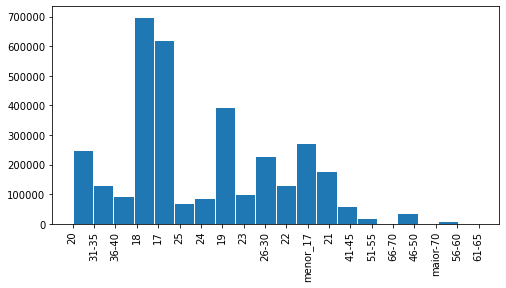

In [19]:
plt.figure(figsize=(8, 4)) 
plt.hist(faixa_etaria,bins=20,edgecolor='white')
plt.xticks(rotation=90) 
plt.show() 

In [20]:
estado_civil=df['TP_ESTADO_CIVIL'].replace([0,1,2,3,4],
                            ['Não informado', 'Solteiro(a)', 'Casado(a) Mora c/ compan', 'Separado(a)', 'Viuvo(a)'])

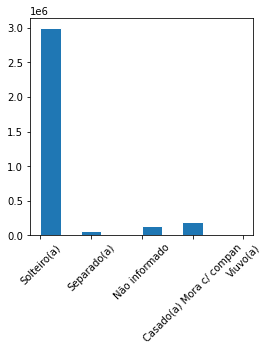

In [21]:
plt.figure(figsize=(4, 4)) 
plt.hist(estado_civil,bins=10,edgecolor='white')
plt.xticks(rotation=45) 
plt.show() 

In [22]:
cor_raca=df['TP_COR_RACA'].replace([0,1,2,3,4,5,6], 
                                   ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela','Indigena', 'Não sabe'])

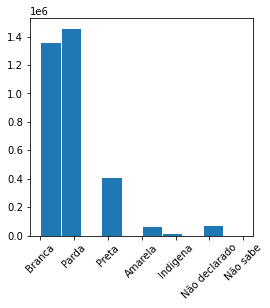

In [23]:
plt.figure(figsize=(4, 4)) 
plt.hist(cor_raca,bins=10,edgecolor='white')
plt.xticks(rotation=45) 
plt.show() 

In [24]:
nacionalidade=df['TP_NACIONALIDADE'].replace([0,1,2,3,4], ['Não informado', 'Brasileiro(a)', 'Brasileiro naturalizado(a)',
                                                          'Estrangeiro(a)', 'Brasileiro nato nascido no exterior'])

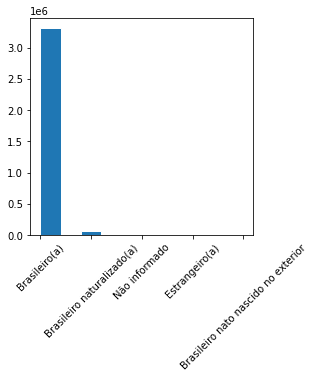

In [25]:
plt.figure(figsize=(4, 4)) 
plt.hist(nacionalidade,bins=10,edgecolor='white')
plt.xticks(rotation=45) 
plt.show() 

In [26]:
ensino_medio=df['TP_ST_CONCLUSAO'].replace([1,2,3,4], ['Concluido', 'Concluirei em 2021', 'Concluirei após 2021', 
                                                      'Não conclui e não estou cursando EM'])

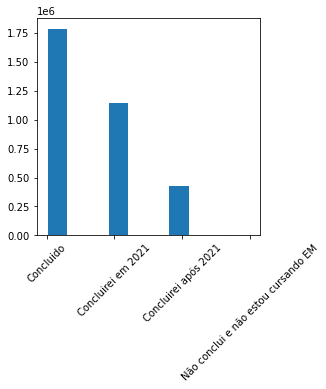

In [27]:
plt.figure(figsize=(4, 4)) 
plt.hist(ensino_medio,bins=10,edgecolor='white')
plt.xticks(rotation=45) 
plt.show() 

In [28]:
ano_conclusao=df['TP_ANO_CONCLUIU'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], ['Nao informado','2020', '2019', '2018', 
                                                                                     '2017', '2016', '2015', '2014', '2013',
                                                                                     '2012', '2011', '2010', '2009', '2008',
                                                                                     '2007', 'Antes de 2007'])

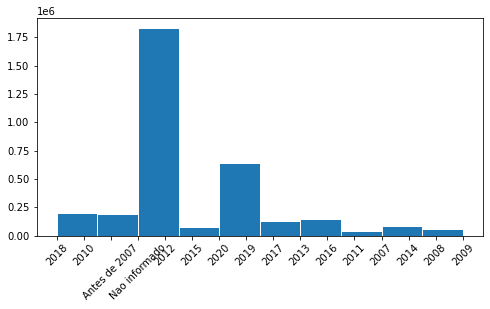

In [29]:
plt.figure(figsize=(8, 4)) 
plt.hist(ano_conclusao,bins=10,edgecolor='white')
plt.xticks(rotation=45) 
plt.show() 

In [30]:
tipo_escola=df['TP_ESCOLA'].replace([1,2,3], ['Não respondeu', 'Pública', 'Privada'])

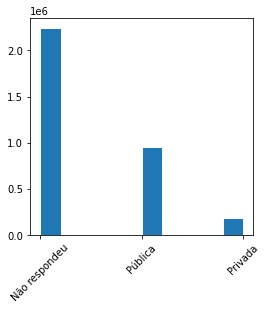

In [31]:
plt.figure(figsize=(4, 4)) 
plt.hist(tipo_escola,bins=10,edgecolor='white')
plt.xticks(rotation=45) 
plt.show() 

In [32]:
treino=df['IN_TREINEIRO'].replace([1,0], ['Sim', 'Não'])

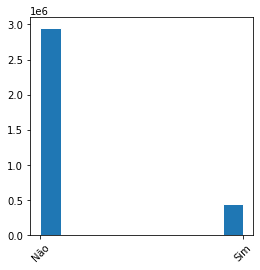

In [33]:
plt.figure(figsize=(4, 4)) 
plt.hist(treino,bins=10,edgecolor='white')
plt.xticks(rotation=45) 
plt.show() 

In [34]:
#FORMA MAIS FÁCIL E MAIS RÁPIDA
dados_candidatos=['TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE','TP_ST_CONCLUSAO', 
                  'TP_ANO_CONCLUIU', 'TP_ESCOLA','IN_TREINEIRO']
df2= df.filter(items=dados_candidatos)

array([[<AxesSubplot:title={'center':'TP_ESTADO_CIVIL'}>,
        <AxesSubplot:title={'center':'TP_COR_RACA'}>,
        <AxesSubplot:title={'center':'TP_NACIONALIDADE'}>],
       [<AxesSubplot:title={'center':'TP_ST_CONCLUSAO'}>,
        <AxesSubplot:title={'center':'TP_ANO_CONCLUIU'}>,
        <AxesSubplot:title={'center':'TP_ESCOLA'}>],
       [<AxesSubplot:title={'center':'IN_TREINEIRO'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

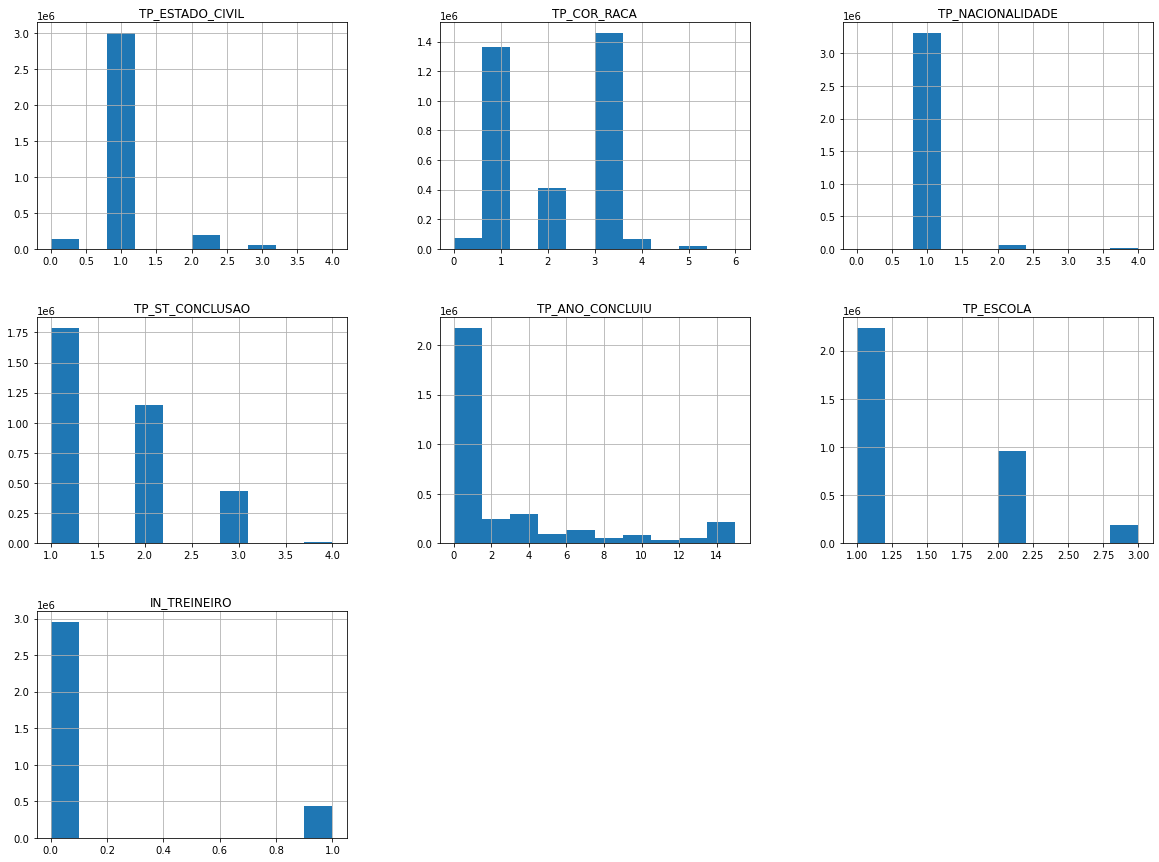

In [35]:
df2.hist(bins=10, figsize=(20, 15))

### PRESENÇA POR TIPO DE PROVA

array([[<AxesSubplot:title={'center':'TP_PRESENCA_CN'}>,
        <AxesSubplot:title={'center':'TP_PRESENCA_CH'}>],
       [<AxesSubplot:title={'center':'TP_PRESENCA_LC'}>,
        <AxesSubplot:title={'center':'TP_PRESENCA_MT'}>]], dtype=object)

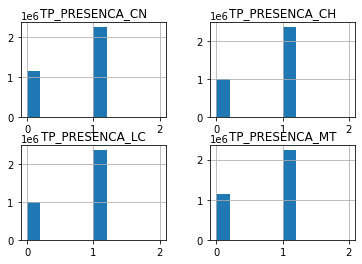

In [36]:
presenca= [ 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT']
df3= df.filter(items=presenca)
df3.hist(bins=10, figsize=(6, 4))

### LINGUA ESTRANGEIRA

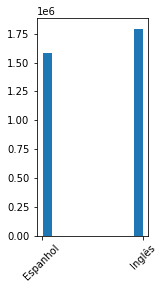

In [37]:
lingua_estrangeira=df['TP_LINGUA'].replace([0,1], ['Inglês', 'Espanhol'])
plt.figure(figsize=(2, 4)) 
plt.hist(lingua_estrangeira,bins=10,edgecolor='white')
plt.xticks(rotation=45) 
plt.show() 

<H1 style="color:blue">RELAÇÃO ENTRE VARIÁVEIS SENSÍVEIS DOS CANDIDATOS E A NOTA DA REDAÇÃO</H1>

In [38]:
sexo_redacao=['TP_SEXO', 'NU_NOTA_REDACAO']
rel_sex_redacao=df.filter(items=sexo_redacao).dropna()
print(rel_sex_redacao.isna().sum())


cor_raca=df['TP_COR_RACA'].replace
raca_redacao=['TP_COR_RACA','NU_NOTA_REDACAO']
rel_raca_redacao=df.filter(items=raca_redacao).dropna().replace([0,1,2,3,4,5,6], 
                                   ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela','Indigena', 'Não sabe'])

print(rel_raca_redacao.isna().sum())

tipoescola=['TP_ESCOLA','NU_NOTA_REDACAO']
rel_tipoescola_redacao=df.filter(items=tipoescola).dropna().replace([1,2,3], ['Não respondeu', 'Pública', 'Privada'])
print(rel_tipoescola_redacao.isna().sum())

idade_redacao=['TP_FAIXA_ETARIA', 'NU_NOTA_REDACAO']
rel_idade_redacao=df.filter(items=idade_redacao).dropna().replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                            ['menor_17','17','18','19','20','21','22','23','24','25','26-30','31-35','36-40','41-45','46-50', 
                            '51-55','56-60','61-65','66-70','maior-70'])
print(rel_idade_redacao.isna().sum())


TP_SEXO            0
NU_NOTA_REDACAO    0
dtype: int64
TP_COR_RACA        0
NU_NOTA_REDACAO    0
dtype: int64
TP_ESCOLA          0
NU_NOTA_REDACAO    0
dtype: int64
TP_FAIXA_ETARIA    0
NU_NOTA_REDACAO    0
dtype: int64


In [39]:
rel_raca_redacao.groupby('TP_COR_RACA').count().sort_values(by='NU_NOTA_REDACAO',  ascending= False)

,NU_NOTA_REDACAO
TP_COR_RACA,
Branca,1033385
Parda,974241
Preta,264726
Amarela,47749
Não declarado,46676
Indigena,11600
Não sabe,2


In [40]:
rel_raca_redacao.groupby('TP_COR_RACA').describe()

NU_NOTA_REDACAO                               
                        count unique            top     freq
TP_COR_RACA                                                 
Amarela               47749.0   46.0          560.0   3190.0
Branca              1033385.0   50.0          600.0  64411.0
Indigena                11600     49  Não declarado      888
Não declarado         46676.0   49.0          560.0   3005.0
Não sabe                  2.0    2.0          480.0      1.0
Parda                974241.0   50.0          560.0  67337.0
Preta                264726.0   49.0          560.0  19679.0

In [41]:
rel_tipoescola_redacao.groupby('TP_ESCOLA').describe()

NU_NOTA_REDACAO                                             \
                        count        mean         std  min    25%    50%   
TP_ESCOLA                                                                  
Não respondeu       1485770.0  618.503927  186.810318  0.0  520.0  600.0   
Privada              183031.0  730.059717  157.545633  0.0  620.0  740.0   
Pública              709578.0  572.958209  192.968836  0.0  480.0  580.0   

                              
                 75%     max  
TP_ESCOLA                     
Não respondeu  740.0  1000.0  
Privada        860.0  1000.0  
Pública        680.0  1000.0

In [42]:
rel_tipoescola_redacao.groupby('TP_ESCOLA').describe()

NU_NOTA_REDACAO                                             \
                        count        mean         std  min    25%    50%   
TP_ESCOLA                                                                  
Não respondeu       1485770.0  618.503927  186.810318  0.0  520.0  600.0   
Privada              183031.0  730.059717  157.545633  0.0  620.0  740.0   
Pública              709578.0  572.958209  192.968836  0.0  480.0  580.0   

                              
                 75%     max  
TP_ESCOLA                     
Não respondeu  740.0  1000.0  
Privada        860.0  1000.0  
Pública        680.0  1000.0

In [43]:
rel_idade_redacao.groupby('TP_FAIXA_ETARIA').describe()

NU_NOTA_REDACAO                                             \
                          count        mean         std  min    25%    50%   
TP_FAIXA_ETARIA                                                              
17                     540726.0  628.038896  188.215347  0.0  540.0  620.0   
18                     551856.0  619.888449  193.313220  0.0  520.0  620.0   
19                     275979.0  625.681229  196.518554  0.0  520.0  620.0   
20                     161465.0  628.429567  193.852919  0.0  520.0  620.0   
21                     106758.0  625.767437  190.731873  0.0  520.0  620.0   
22                      75384.0  620.395309  184.955632  0.0  520.0  600.0   
23                      54773.0  609.749329  182.000628  0.0  520.0  600.0   
24                      44525.0  600.200786  178.332208  0.0  520.0  600.0   
25                      35387.0  592.329386  175.417813  0.0  520.0  580.0   
26-30                  107727.0  576.450472  172.034503  0.0  500.0  580.0   
31-35                   60794.0  554.762312  168.038915  0.0  480.0  560.0   
36-40                   44524.0  529.040967  171.298160  0.0  460.0  540.0   
41-45                   29407.0  509.207332  171.985756  0.0  460.0  540.0   
46-50                   19052.0  499.476170  173.115652  0.0  440.0  520.0   
51-55                   11356.0  495.484325  177.122664  0.0  440.0  520.0   
56-60                    6031.0  487.769856  176.940792  0.0  440.0  520.0   
61-65                    2336.0  467.123288  181.762803  0.0  400.0  500.0   
66-70                     793.0  455.258512  188.080992  0.0  380.0  500.0   
maior-70                  335.0  416.119403  196.174150  0.0  360.0  460.0   
menor_17               249171.0  620.535135  190.644621  0.0  540.0  620.0   

                                
                   75%     max  
TP_FAIXA_ETARIA                 
17               760.0  1000.0  
18               760.0  1000.0  
19               760.0  1000.0  
20               760.0  1000.0  
21               760.0  1000.0  
22               740.0  1000.0  
23               720.0   980.0  
24               700.0   980.0  
25               680.0   980.0  
26-30            660.0   980.0  
31-35            640.0   980.0  
36-40            620.0   980.0  
41-45            600.0   980.0  
46-50            600.0   980.0  
51-55            600.0   960.0  
56-60            600.0   940.0  
61-65            580.0   960.0  
66-70            560.0   900.0  
maior-70         540.0   820.0  
menor_17         740.0  1000.0

In [44]:
rel_sex_redacao[rel_sex_redacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min() #nota mínima em cada sexo # de 0

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


In [45]:
rel_sex_redacao.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             1470366.0  624.351338  189.050757  0.0  520.0  620.0  760.0   
M              908013.0  595.929464  192.081911  0.0  520.0  600.0  720.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

# ES

In [46]:
candidatos_es= ['NU_INSCRICAO','TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA','TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA','IN_TREINEIRO',
        'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA','TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
       'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [47]:
df_es= microdadosEnem.filter(items=candidatos_es).where(df.SG_UF_PROVA=='ES').dropna()


In [48]:
sexo_redacao=['TP_SEXO', 'NU_NOTA_REDACAO']
rel_sex_redacao_es=df_es.filter(items=sexo_redacao).dropna()

raca_redacao=['TP_COR_RACA','NU_NOTA_REDACAO']
rel_raca_redacao_es=df_es.filter(items=raca_redacao).dropna().replace([0,1,2,3,4,5,6], 
                                   ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela','Indigena', 'Não sabe'])

tipoescola=['TP_ESCOLA','NU_NOTA_REDACAO']
rel_tipoescola_redacao_es=df_es.filter(items=tipoescola).dropna().replace([1,2,3], ['Não respondeu', 'Pública', 'Privada'])

idade_redacao=['TP_FAIXA_ETARIA', 'NU_NOTA_REDACAO']
rel_idade_redacao_es=df_es.filter(items=idade_redacao).dropna().replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                            ['menor_17','17','18','19','20','21','22','23','24','25','26-30','31-35','36-40','41-45','46-50', 
                            '51-55','56-60','61-65','66-70','maior-70'])


In [49]:
rel_sex_redacao_es.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F               25596.0  647.183154  185.496857  0.0  540.0  640.0  780.0   
M               16452.0  616.337223  184.013119  0.0  520.0  600.0  740.0   

                
           max  
TP_SEXO         
F        980.0  
M        980.0

In [50]:
rel_raca_redacao_es.groupby('TP_COR_RACA').describe()

NU_NOTA_REDACAO                      
                        count unique    top    freq
TP_COR_RACA                                        
Amarela                 494.0   37.0  560.0    36.0
Branca                18509.0   43.0  600.0  1090.0
Indigena                154.0   31.0  560.0    16.0
Não declarado           667.0   37.0  600.0    45.0
Não sabe                  1.0    1.0  500.0     1.0
Parda                 17045.0   44.0  600.0  1217.0
Preta                  5178.0   41.0  560.0   407.0

In [51]:
rel_tipoescola_redacao_es.groupby('TP_ESCOLA').describe()

NU_NOTA_REDACAO                                             \
                        count        mean         std  min    25%    50%   
TP_ESCOLA                                                                  
Não respondeu         24103.0  633.923578  185.871565  0.0  540.0  620.0   
Privada                2574.0  761.686092  154.666602  0.0  660.0  800.0   
Pública               15371.0  615.785570  181.447263  0.0  520.0  600.0   

                             
                 75%    max  
TP_ESCOLA                    
Não respondeu  760.0  980.0  
Privada        880.0  980.0  
Pública        720.0  980.0

In [52]:
rel_idade_redacao_es.groupby('TP_FAIXA_ETARIA').describe()

NU_NOTA_REDACAO                                             \
                          count        mean         std  min    25%    50%   
TP_FAIXA_ETARIA                                                              
17                       8822.0  650.784403  183.235223  0.0  560.0  640.0   
18                      12261.0  642.993231  182.607752  0.0  540.0  640.0   
19                       5251.0  655.082841  190.065171  0.0  540.0  640.0   
20                       2768.0  654.963873  190.494569  0.0  560.0  640.0   
21                       1712.0  652.640187  181.048421  0.0  540.0  640.0   
22                       1179.0  634.944869  169.349779  0.0  540.0  620.0   
23                        854.0  624.941452  162.689684  0.0  540.0  600.0   
24                        717.0  612.412831  164.823953  0.0  520.0  600.0   
25                        571.0  602.521891  167.283605  0.0  520.0  600.0   
26-30                    1605.0  576.199377  168.421630  0.0  500.0  580.0   
31-35                     980.0  553.857143  167.234979  0.0  500.0  560.0   
36-40                     677.0  524.697194  177.600138  0.0  460.0  540.0   
41-45                     512.0  508.281250  169.443012  0.0  460.0  520.0   
46-50                     326.0  497.361963  164.794803  0.0  440.0  520.0   
51-55                     223.0  491.390135  172.875379  0.0  440.0  540.0   
56-60                     115.0  498.782609  148.448986  0.0  450.0  520.0   
61-65                      49.0  467.346939  166.917838  0.0  460.0  500.0   
66-70                      19.0  451.578947  235.543418  0.0  360.0  520.0   
maior-70                    6.0  430.000000  227.596134  0.0  410.0  490.0   
menor_17                 3401.0  646.456924  190.251077  0.0  560.0  640.0   

                               
                   75%    max  
TP_FAIXA_ETARIA                
17               780.0  980.0  
18               780.0  980.0  
19               800.0  980.0  
20               805.0  980.0  
21               800.0  980.0  
22               740.0  980.0  
23               720.0  980.0  
24               720.0  980.0  
25               680.0  980.0  
26-30            660.0  980.0  
31-35            620.0  960.0  
36-40            620.0  960.0  
41-45            600.0  960.0  
46-50            580.0  920.0  
51-55            600.0  860.0  
56-60            580.0  880.0  
61-65            560.0  760.0  
66-70            570.0  760.0  
maior-70         555.0  640.0  
menor_17         780.0  980.0

# DM

In [53]:
df_dm=df_es.filter(items=candidatos_es).where(df_es['NO_MUNICIPIO_PROVA']=='Domingos Martins').dropna()


In [54]:
sexo_redacao=['TP_SEXO', 'NU_NOTA_REDACAO']
rel_sex_redacao_dm=df_dm.filter(items=sexo_redacao).dropna()

raca_redacao=['TP_COR_RACA','NU_NOTA_REDACAO']
rel_raca_redacao_dm=df_dm.filter(items=raca_redacao).dropna().replace([0,1,2,3,4,5,6], 
                                   ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela','Indigena', 'Não sabe'])

tipoescola=['TP_ESCOLA','NU_NOTA_REDACAO']
rel_tipoescola_redacao_dm=df_dm.filter(items=tipoescola).dropna().replace([1,2,3], ['Não respondeu', 'Pública', 'Privada'])

idade_redacao=['TP_FAIXA_ETARIA', 'NU_NOTA_REDACAO']
rel_idade_redacao_dm=df_dm.filter(items=idade_redacao).dropna().replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                            ['menor_17','17','18','19','20','21','22','23','24','25','26-30','31-35','36-40','41-45','46-50', 
                            '51-55','56-60','61-65','66-70','maior-70'])


In [55]:
rel_sex_redacao_dm.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F                 369.0  648.563686  186.397037  0.0  560.0  640.0  780.0   
M                 191.0  621.989529  168.067092  0.0  540.0  620.0  740.0   

                
           max  
TP_SEXO         
F        980.0  
M        940.0

In [56]:
rel_raca_redacao_dm.groupby('TP_COR_RACA').describe()

NU_NOTA_REDACAO                    
                        count unique    top  freq
TP_COR_RACA                                      
Amarela                   2.0    2.0  520.0   1.0
Branca                  347.0   37.0  600.0  30.0
Indigena                  4.0    4.0  560.0   1.0
Não declarado             8.0    7.0  740.0   2.0
Parda                   175.0   34.0  540.0  12.0
Preta                    24.0   15.0  640.0   4.0

In [57]:
rel_tipoescola_redacao_dm.groupby('TP_ESCOLA').describe()

NU_NOTA_REDACAO                                               \
                        count        mean         std    min    25%    50%   
TP_ESCOLA                                                                    
Não respondeu           261.0  617.547893  178.412127    0.0  540.0  600.0   
Privada                   5.0  812.000000  208.614477  440.0  880.0  900.0   
Pública                 294.0  656.054422  179.459020    0.0  560.0  660.0   

                             
                 75%    max  
TP_ESCOLA                    
Não respondeu  720.0  980.0  
Privada        920.0  920.0  
Pública        800.0  960.0

In [58]:
rel_idade_redacao_dm.groupby('TP_FAIXA_ETARIA').describe()

NU_NOTA_REDACAO                                               \
                          count        mean         std    min    25%    50%   
TP_FAIXA_ETARIA                                                                
17                        128.0  638.593750  191.458284    0.0  560.0  640.0   
18                        223.0  664.573991  187.305870    0.0  560.0  660.0   
19                         53.0  642.264151  154.703706  300.0  540.0  620.0   
20                         17.0  754.117647  139.241644  560.0  640.0  780.0   
21                         12.0  646.666667  175.257386  400.0  460.0  660.0   
22                          9.0  517.777778   88.568868  300.0  520.0  540.0   
23                          7.0  725.714286  135.506106  540.0  630.0  760.0   
24                          8.0  705.000000  138.460928  580.0  615.0  660.0   
25                          6.0  606.666667   64.083279  520.0  580.0  590.0   
26-30                      12.0  585.000000  116.345879  380.0  540.0  570.0   
31-35                       9.0  477.777778  196.581903    0.0  500.0  540.0   
36-40                       5.0  520.000000  161.864141  240.0  540.0  560.0   
41-45                       1.0    0.000000         NaN    0.0    0.0    0.0   
46-50                       1.0  480.000000         NaN  480.0  480.0  480.0   
51-55                       2.0  560.000000    0.000000  560.0  560.0  560.0   
56-60                       2.0  490.000000   14.142136  480.0  485.0  490.0   
menor_17                   65.0  585.230769  147.786879    0.0  500.0  600.0   

                               
                   75%    max  
TP_FAIXA_ETARIA                
17               765.0  940.0  
18               800.0  960.0  
19               760.0  940.0  
20               900.0  920.0  
21               750.0  900.0  
22               560.0  600.0  
23               790.0  940.0  
24               730.0  960.0  
25               645.0  700.0  
26-30            640.0  820.0  
31-35            580.0  640.0  
36-40            620.0  640.0  
41-45              0.0    0.0  
46-50            480.0  480.0  
51-55            560.0  560.0  
56-60            495.0  500.0  
menor_17         640.0  980.0

In [59]:
df.columns.values

array(['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO',
       'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'EDUC_PAI', 'EDUC_AME', 'OCUP_PAI', 'OCUP_MAE',
       'N_PESSOAS_CASA', 'RENDA_FAM', 'DOMESTICA', 'BANHEIRO',
       'N_QUARTOS', 'CARRO', 'MOTO', 'GELADEIRA', 'FREEZER',
       'MAQUINA_LAVAR', 'MAQUINA_SECAR', 'MICROONDAS', 'MAQUINA_LOUCA',
       'ASPIRADOR', 'TELEVISAO', 'DVD', 'TV_ASSINATURA', 'CELULAR',
       'TELEFONE_FIXO', 'COMPUTADOR', 'INTERNET'], dtype=object)

In [60]:
df_2=df.filter(items=['NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
df_2         

,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,Nova Lima,MG,NaN,574.6,472.6,NaN,760.0
1,Maceió,AL,505.9,551.8,498.3,461.5,560.0
2,Ferraz de Vasconcelos,SP,NaN,NaN,NaN,NaN,NaN
3,Crato,CE,580.7,678.9,638.9,659.5,780.0
4,Acarape,CE,497.7,532.4,457.6,582.6,780.0
...,...,...,...,...,...,...,...
3389827,Goiânia,GO,NaN,NaN,NaN,NaN,NaN
3389828,Londrina,PR,NaN,NaN,NaN,NaN,NaN
3389829,Rio de Janeiro,RJ,NaN,NaN,NaN,NaN,NaN
3389830,Pouso Alegre,MG,563.7,646.0,550.7,706.4,660.0


In [61]:
df_municipio=df_2.groupby(['NO_MUNICIPIO_PROVA', 'SG_UF_PROVA'], as_index=False).mean().dropna()
df_municipio
#as_index=False para não mudar o index do df

,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,Abaetetuba,PA,460.111672,479.570572,459.218790,479.538751,588.532744
1,Abaeté,MG,498.348566,519.267921,508.300792,548.978074,634.772277
2,Abreu e Lima,PE,470.482794,495.579732,484.547952,499.651985,575.240113
3,Acarape,CE,461.058842,479.322561,468.504268,486.664309,571.463415
4,Acaraú,CE,454.658985,471.924290,469.662390,500.029239,557.747307
...,...,...,...,...,...,...,...
1742,Água Preta,PE,456.327119,471.965217,465.977174,487.633898,579.130435
1743,Águas Belas,PE,455.701250,479.161891,465.749040,489.713906,566.085672
1744,Águas Formosas,MG,475.928788,503.790672,488.807463,511.159470,589.477612
1745,Águas Lindas de Goiás,GO,461.575293,491.560046,477.157541,488.772582,550.700057


In [62]:
df_municipio.to_csv('df_municipios.csv')

In [63]:
df_estados=df_2.groupby(['SG_UF_PROVA'], as_index=False).mean().dropna()
df_estados
#as_index=False para não mudar o index do df

,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,AC,469.594137,497.732621,482.732890,495.792953,580.488337
1,AL,476.636704,501.636090,484.533819,516.803197,608.838246
2,AM,460.326105,482.040857,468.699211,486.207394,529.633243
3,AP,467.700774,495.448382,473.610379,491.373826,572.171824
4,BA,479.939563,506.234466,489.131131,513.507987,606.276969
5,CE,477.067044,504.285991,490.236593,521.452906,589.260788
6,DF,508.653293,539.615348,522.697463,552.185937,622.075413
7,ES,503.879663,529.864191,510.219550,549.471244,624.784927
8,GO,486.978370,514.029345,497.812210,527.629089,614.992351
9,MA,465.963606,489.311337,472.789557,496.178127,587.840190


In [64]:
df_estados.to_csv('df_estados.csv')